# Attention : 
# Faire "File -> Save a copy in Drive" avant de commencer à modifier le notebook, sinon vos modifications ne seront pas sauvegardées.


In [ ]:
!wget http://webia.lip6.fr/~dancette/deep-learning/assets/TP1-2-data.zip
!unzip TP1-2-data.zip

!wget http://webia.lip6.fr/~dancette/deep-learning/assets/TP1-2/tools.py

--2020-10-29 20:20:29--  http://webia.lip6.fr/~dancette/deep-learning/assets/TP1-2-data.zip
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86446976 (82M) [application/zip]
Saving to: ‘TP1-2-data.zip’

TP1-2-data.zip      100%[===================>]  82.44M  21.8MB/s    in 3.8s    

2020-10-29 20:20:33 (21.8 MB/s) - ‘TP1-2-data.zip’ saved [86446976/86446976]

Archive:  TP1-2-data.zip
   creating: data/
   creating: data/Scene/
   creating: data/Scene/PARoffice/
 extracting: data/Scene/PARoffice/image_0091.jpg  
 extracting: data/Scene/PARoffice/image_0167.jpg  
  inflating: data/Scene/PARoffice/image_0037.jpg  
 extracting: data/Scene/PARoffice/image_0135.jpg  
 extracting: data/Scene/PARoffice/image_0015.jpg  
 extracting: data/Scene/PARoffice/image_0182.jpg  
 extracting: data/Scene/PARoffice/image_0064.jpg  
 extracting: data/Scene/PARoffice/im

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import numpy as np
%run 'tools.py'
from os.path import join

data_path = "data"

# Partie 1 : SIFT

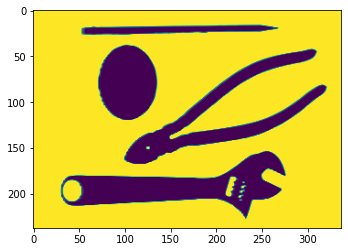

In [ ]:
# example images
I = read_grayscale(join(data_path, 'tools.tiff'))
I2 = read_grayscale(join(data_path, 'Scene/CALsuburb/image_0205.jpg'))
plt.imshow(I)



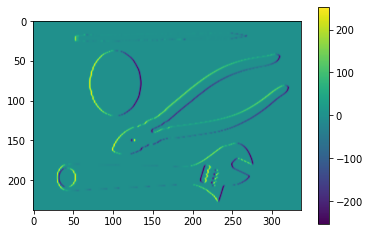

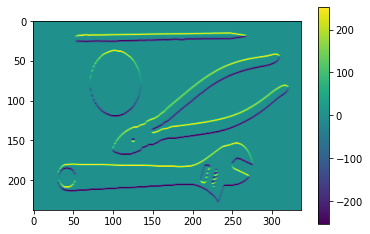

In [ ]:
from scipy.ndimage import convolve


def compute_grad(I):
    #####################
    ## Votre code ici  ##
    #####################
    Ix = convolve(I, (1/4) * np.array([[-1,0,1],
                                       [-2,0,2],
                                       [-1,0,1]]))
    
    Iy = convolve(I, (1/4) * np.array([[-1,-2,-1],
                                       [ 0, 0, 0],
                                       [ 1, 2, 1]]))

    
    ####################
    ##      FIN        #
    ####################
    return Ix, Iy

# example d'affichage du résultat
Ix, Iy = compute_grad(I)
plt.imshow(Ix)
plt.colorbar()
plt.show()
plt.imshow(Iy)
plt.colorbar()
plt.show()

In [ ]:
def compute_grad_mod_ori(I):
    #####################
    ## Votre code ici  ##
    #####################
    Ix, Iy = compute_grad(I)
    
    Gn = np.sqrt(Ix*Ix + Iy*Iy) 

    Go = compute_grad_ori(Ix, Iy, Gn)
    
    ####################
    ##      FIN        #
    ####################
    return Gn, Go

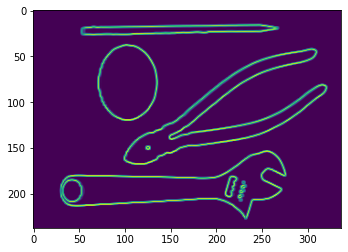

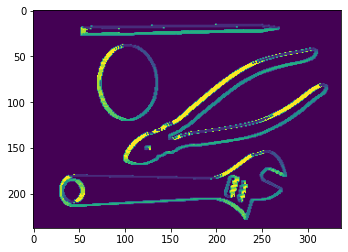

In [ ]:
Gn,Go = compute_grad_mod_ori(I)
plt.imshow(Gn)
plt.show()
plt.imshow(Go)
plt.show()

In [ ]:
def compute_histogram(g_n, g_o):
    """
    g_n and g_o are 4x4 matrices that contain the norm, and the discretized orientation.
    Warning: g_o can contain -1, those values should be discarded.
    """
    hist = np.zeros((8))

    #####################
    ## Votre code ici  ##
    #####################
    for i in range(8): 
      hist[i] = np.sum(np.where(g_o == i, g_n, 0))
    
    ####################
    ##      FIN        #
    ####################

    return hist
  


In [ ]:
  def compute_sift_region(Gn, Go, mask=None):
    t_min=.5
    t_max=.2
    with_l2 = True

    patch_size = 16
    sift = np.zeros((128)) 

    if mask is not None:
        Gn = Gn * mask
    
    idx = 0
    for k in range(0, patch_size, 4):
        for l in range(0, patch_size, 4):
            hist = compute_histogram(Gn[l:l+4,k:k+4], Go[l:l+4,k:k+4])            
            sift[idx:idx+8] = hist
            idx += 8

    norm = np.linalg.norm(sift, ord=2)
    # min thresholding on norm
    if norm <= t_min:
        return np.zeros((128))
    # l2-normalization
    if with_l2:
        sift = sift / norm
    # max thresholding on values
    sift[sift >= t_max] = t_max
    # l2-normalization
    if with_l2:
        norm = np.linalg.norm(sift, ord=2)
        sift = sift / norm
    return sift

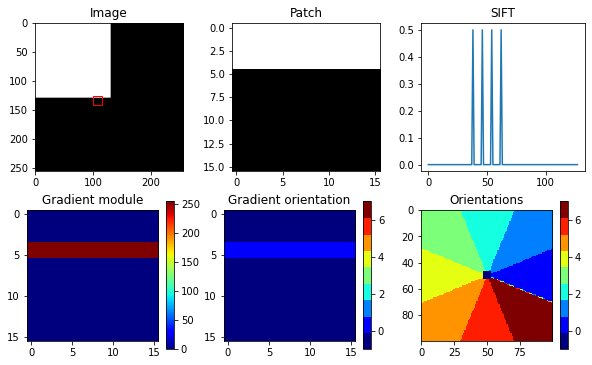

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [ ]:
# Example of viz of SIFTs
# set gausm to True to apply mask weighting of gradients
#display_sift_region(I,           compute_grad_mod_ori, compute_sift_region, x=200, y=78, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
#display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
#display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=125, y=100, gausm=False)
#display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=121, y=121, gausm=False)
#display_sift_region(toy_im(),    compute_grad_mod_ori, compute_sift_region, x=95, y=95, gausm=False)

In [ ]:
def compute_sift_image(I):
    x, y = dense_sampling(I)
    im = auto_padding(I)
    m = gaussian_mask()
    
    #####################
    ## Votre code ici  ##
    #####################
    # Ici, effectuez les calculs sur l'image globale (norme, gradients)
    Gn, Go = compute_grad_mod_ori(im)

    ####################
    ##      FIN        #
    ####################

    sifts = np.zeros((len(x), len(y), 128))
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            #####################
            ## Votre code ici  ##
            #####################

            sifts[i, j, :] = compute_sift_region(Gn[xi:xi+16, yj:yj+16], Go[xi:xi+16, yj:yj+16], mask=m) # TODO SIFT du patch de coordonnee (xi, yj)

            ####################
            ##      FIN        #
            ####################

    return sifts

print(I.shape)
dense_sampling(I)

(238, 337)


(array([  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
        104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200,
        208, 216, 224, 232]),
 array([  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
        104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200,
        208, 216, 224, 232, 240, 248, 256, 264, 272, 280, 288, 296, 304,
        312, 320, 328, 336]))

# Compute SIFT

Le calcul durera plusieurs minutes.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

KeyboardInterrupt: ignored

In [ ]:
max_images_per_class = 10  # You can change this to None to compute the whole dataset (takes quite some time)

save_path = "/content/gdrive/My Drive/rdfia/"
dir_sc = os.path.join(data_path, 'Scene')
dir_sift = os.path.join(save_path, 'sift')
inames, ilabls, cnames = load_dataset(dir_sc, images_per_class=max_images_per_class)
sifts_list_by_image = compute_load_sift_dataset(dir_sc, dir_sift, inames, compute_sift_image)

Computing or loading SIFTs


# Partie 2 : Dictionnaire visuel

In [ ]:
from sklearn.cluster import KMeans

path_vdict = os.path.join(save_path, 'kmeans', 'vdict.npy')
os.makedirs(os.path.join(save_path, 'kmeans'), exist_ok=True)

In [ ]:
# Code here the `compute_visual_dict` function
def compute_visual_dict(sift, n_clusters=1000, n_init=1, verbose=1):
    # reorder data
    dim_sift = sift[0].shape[-1]
    sift = [s.reshape(-1, dim_sift) for s in sift]
    sift = np.concatenate(sift, axis=0)
    # remove zero vectors
    keep = ~np.all(sift==0, axis=1)
    sift = sift[keep]
    # randomly pick sift
    ids, _ = compute_split(sift.shape[0], pc=0.05)
    sift = sift[ids]

    # TODO compute kmeans on `sift`, get cluster centers, add zeros vector, and return visual dict
    #####################
    ## Votre code ici  ##
    #####################
    kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=n_init, verbose=verbose).fit(sift)
    
    vdict = kmeans.cluster_centers_
    nul_vector = np.zeros((1,dim_sift))
    vdict = np.concatenate((vdict, nul_vector), axis=0)
    
    
    ####################
    ##      FIN        #
    ####################
    return vdict



In [ ]:
# Run the visual dict computation (saved the first time)
vdict = compute_or_load_vdict(dir_sc, dir_sift, inames, compute_sift_image, path_vdict, compute_visual_dict)

type(vdict)

Computing or loading visual dict
Computing or loading SIFTs
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 138035422.31673172
start iteration
done sorting
end inner loop
Iteration 1, inertia 134687378.10629126
start iteration
done sorting
end inner loop
Iteration 2, inertia 133671447.18598744
start iteration
done sorting
end inner loop
Iteration 3, inertia 133237311.18439436
start iteration
done sorting
end inner loop
Iteration 4, inertia 133028084.13279644
start iteration
done sorting
end inner loop
Iteration 5, inertia 132934363.82177886
start iteration
done sorting
end inner loop
Iteration 6, inertia 132894380.91414453
start iteration
done sorting
end inner loop
Iteration 7, inertia 132862706.50165865
start iteration
done sorting
end inner loop
Iteration 8, inertia 132858232.1058884
start iteration
done sorting
end inner loop
Iteration 9, inertia 132854328.38932239
start iteration
done sorting
end inner loop
Iteration 10, inertia 132854328.3

numpy.ndarray

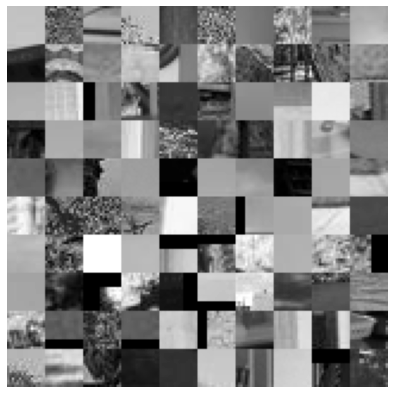

In [ ]:
# Study of the dict

# choose random images
indexes = np.random.randint(0, len(inames), 30)
sifts = [sifts_list_by_image[i] for i in indexes]
chosen_inames = [inames[i] for i in indexes]

regions, sifts = get_regions_and_sifts(dir_sc, chosen_inames, sifts) # Compute SIFT and regions from 30 random images

sample_viz = regions[np.random.choice(len(regions), 100)]
display_images(sample_viz) # Show 100 random regions

# TODO visually analyze the dict through similar example regions

#
# Ideally, create `vdregions`, a numpy array of size 1001 x 16 x 16 where each of the 1001 elements is a
# "prototype" patch that is very close to the cluster center

#from scipy import spatial

#tree = spatial.KDTree(sifts)
#nearst_region = tree.query(vdict)

#id_nearst_region = id_nearst_region[1]

from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=1,algorithm='ball_tree').fit(sifts)
dist, ind_nearest_region = nbrs.kneighbors(vdict)

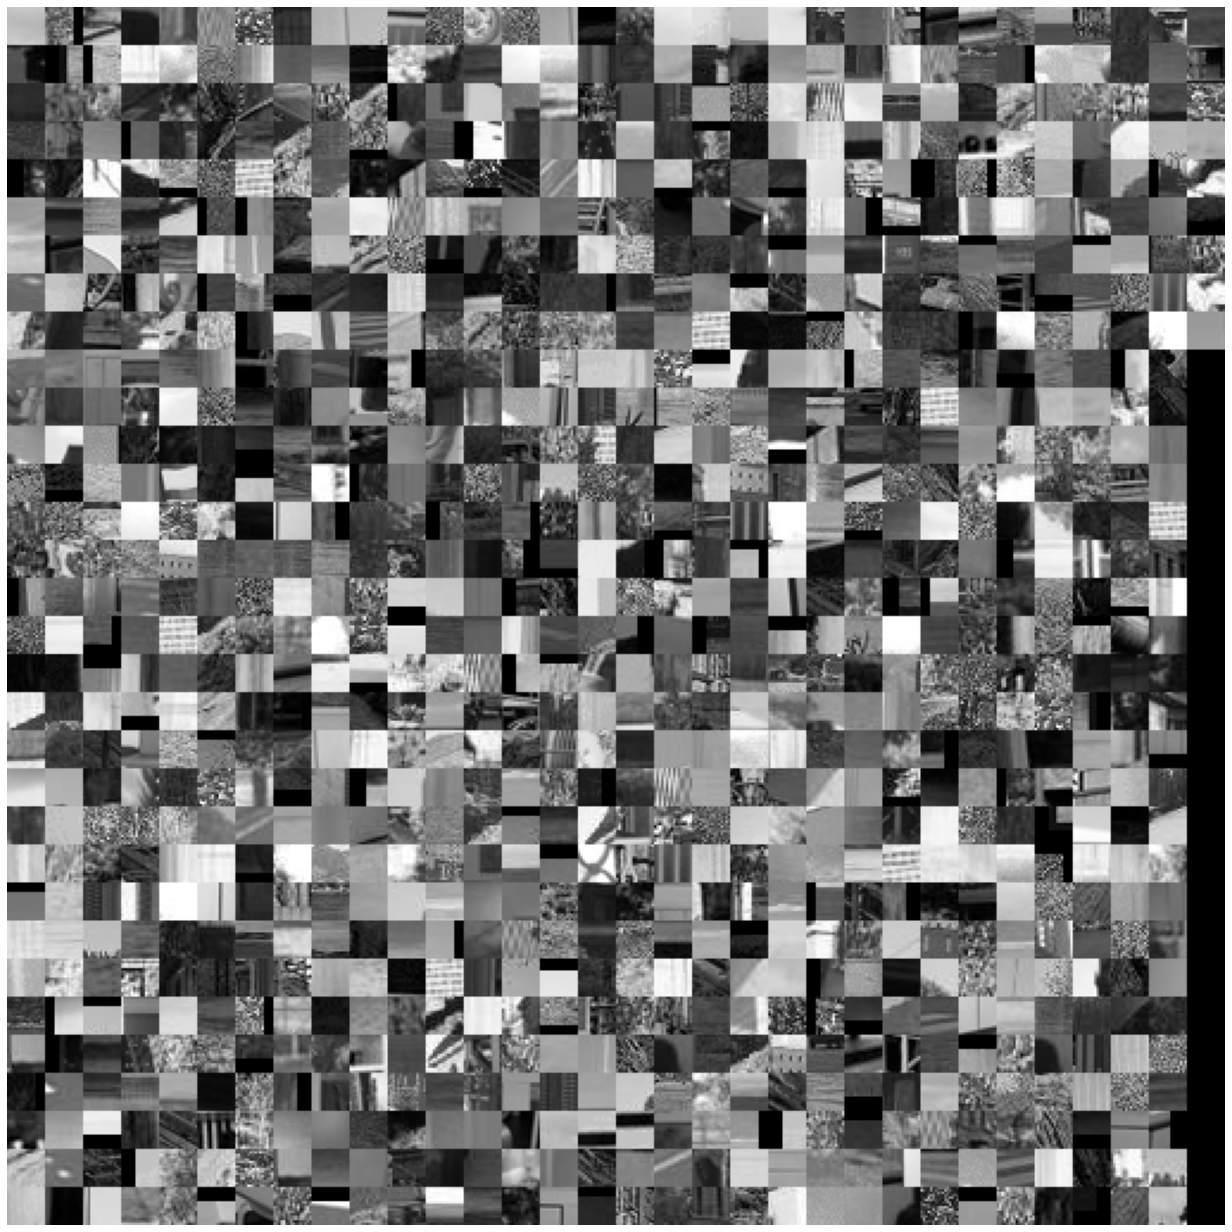

In [ ]:
# Nearest region to each cluster center
region_by_cluster = regions[ind_nearest_region.reshape(-1)]

display_images(region_by_cluster)


# Partie 3 : BoW

In [ ]:
# TODO Compute BoW for an image
# indication: scipy.spatial.distance_matrix
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance_matrix

def compute_feats(vdict, image_sifts):
    """
    vdict: (num_clusters, 128): visual dictionnary containing all clusters.
    image_sifts: (H, W, 128) all sift features from the given image
    """
    # flatten sifts
    sifts = image_sifts.reshape(-1, 128)  # (N, 128)
    feats = np.zeros(vdict.shape[0])

    ##################### 
    ## Votre code ici  ##
    #####################
    # compute distance from image sifts to vdict
    dist_M = distance_matrix(sifts, vdict)
    #Construction de la matrice des vecteurs one-hot
    dist_M = (dist_M == dist_M.min(axis=1)[:,None]).astype(int)
    
    #Pooling
    feats = dist_M.sum(axis=0)

    #normalisation
    feats = feats / np.linalg.norm(feats)

  
    ####################
    ##      FIN        #
    ####################
    return feats


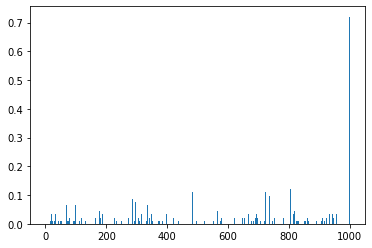

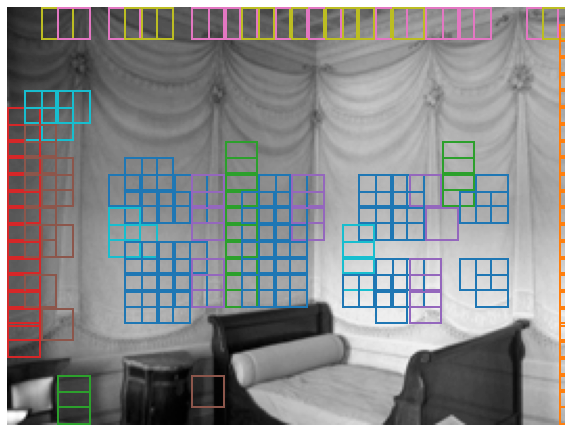

(9, 16, 16)


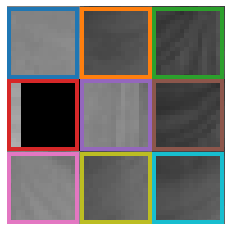

In [ ]:
# Visualize your BoW on an image

iname = inames[101]
ipath = os.path.join(dir_sc, iname)
im = read_grayscale(ipath)
sift = compute_sift_image(im)
sift = (sift * 255).astype('uint8')
regions = compute_regions(im)
feats = compute_feats(vdict, sift)
display_vdregions_image(im, vdict, sift, feats, vdregions=None) # if you have vdregions, add it as input here